In [85]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram

In [78]:
# prepare a quantum circuit with two qubits
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits)

In [79]:
# initialize the state
def initialize_s(qc,qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [80]:
grover_circuit = initialize_s(grover_circuit,[0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [81]:
# apply controlled-Z gates as an oracle
grover_circuit.cz(0,1)
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [82]:
# apply diffusion operator and measure the qubits
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘ ░  ║ └╥┘
meas_0: ══════════════════════════════╩══╬═
                                         ║ 
meas_1: ═════════════════════════════════╩═

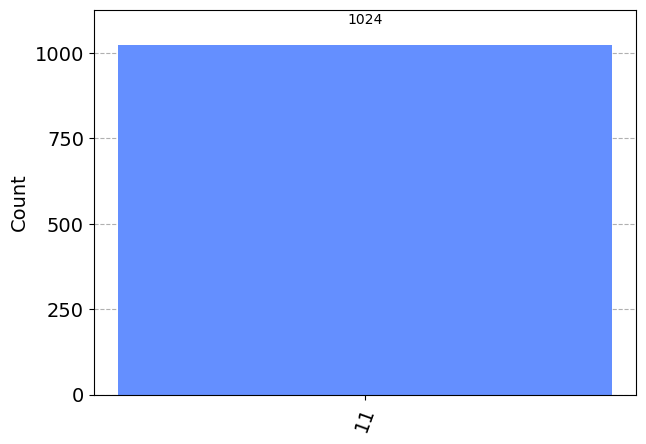

In [83]:
# run the circuit in simulation
aer_sim = Aer.get_backend('aer_simulator')
job = assemble(grover_circuit)
result = aer_sim.run(job).result()
counts = result.get_counts()
plot_histogram(counts)

In [84]:
# run the circuit on a real quantum computer
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print(device)

ibmq_lima


In [86]:
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


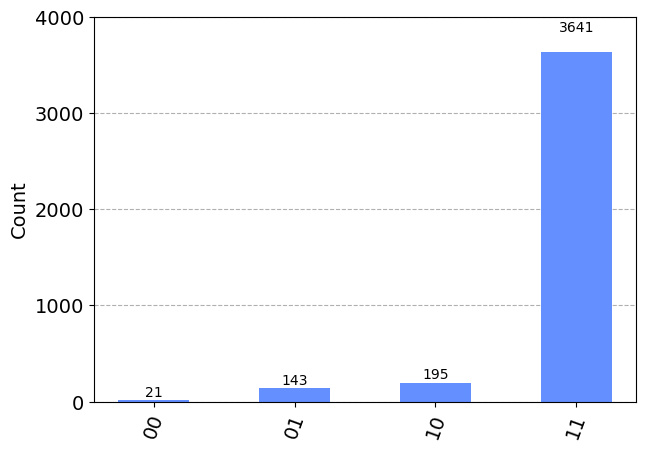

In [87]:
# get results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)